In [366]:
import pandas as pd # data processing 
import numpy as np # linear algebra 


# plotting libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

# ML libraries 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

# ML models 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 

# for UI 
import ipywidgets as widgets 
from IPython.display import display 

## Load CSV File 

In [367]:
# load mortgage data from a csv file for training
training = 'Desktop/train.csv'
train_df = pd.read_csv(training)

In [368]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [369]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [370]:
del train_df['Loan_ID']


In [371]:
# Changing the column names for cleaner look for graphs below 
train_df = train_df.rename(columns = {'ApplicantIncome' : 'Applicant_Income',
                         'CoapplicantIncome' : 'Co_Applicant_Income',
                         'LoanAmount': 'Loan_Amount'})

In [372]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               601 non-null    object 
 1   Married              611 non-null    object 
 2   Dependents           599 non-null    float64
 3   Education            614 non-null    object 
 4   Self_Employed        582 non-null    object 
 5   Applicant_Income     614 non-null    int64  
 6   Co_Applicant_Income  614 non-null    float64
 7   Loan_Amount          592 non-null    float64
 8   Loan_Amount_Term     600 non-null    float64
 9   Credit_History       564 non-null    float64
 10  Property_Area        614 non-null    object 
 11  Loan_Status          614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


## Graph Data 

In [373]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount']


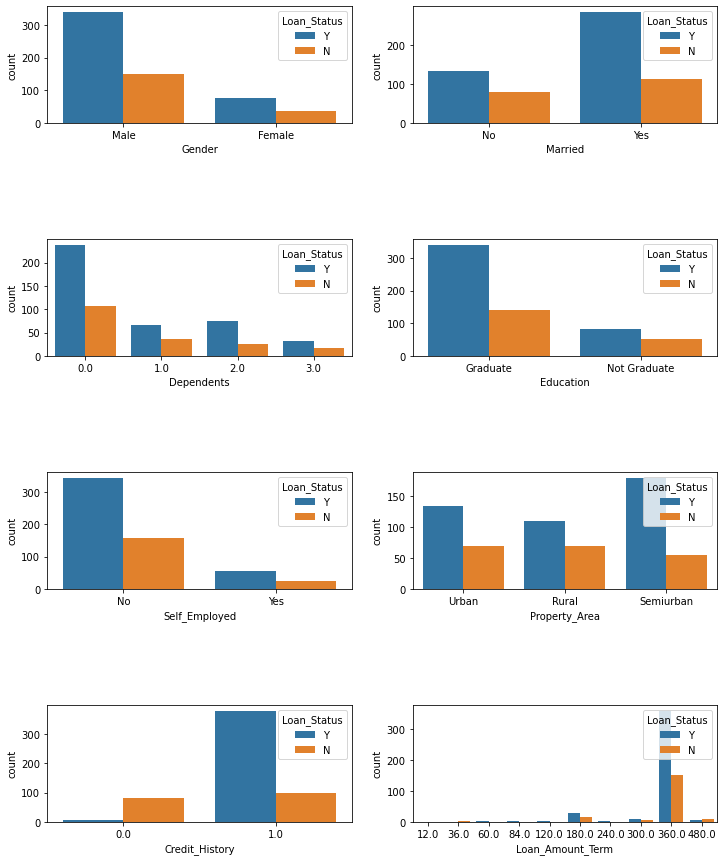

In [374]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

<AxesSubplot:>

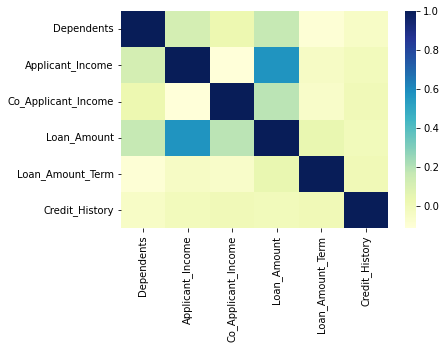

In [375]:
# plot heatmap 
sns.heatmap(train_df.corr(), cmap='YlGnBu')

In [376]:
# correlation table 

c = train_df.corr()

c.style.background_gradient(cmap='YlGnBu')

,Dependents,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082
Applicant_Income,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715
Co_Applicant_Income,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056
Loan_Amount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000


       Applicant_Income  Co_Applicant_Income  Loan_Amount
count        614.000000           614.000000   592.000000
mean        5403.459283          1621.245798   146.412162
std         6109.041673          2926.248369    85.587325
min          150.000000             0.000000     9.000000
25%         2877.500000             0.000000   100.000000
50%         3812.500000          1188.500000   128.000000
75%         5795.000000          2297.250000   168.000000
max        81000.000000         41667.000000   700.000000


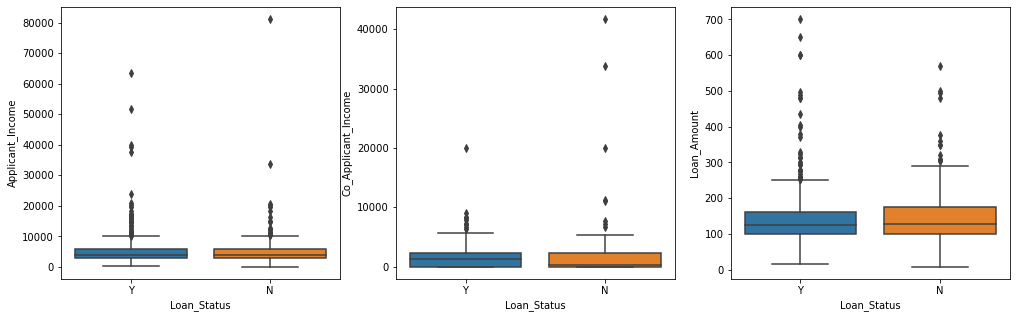

In [377]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

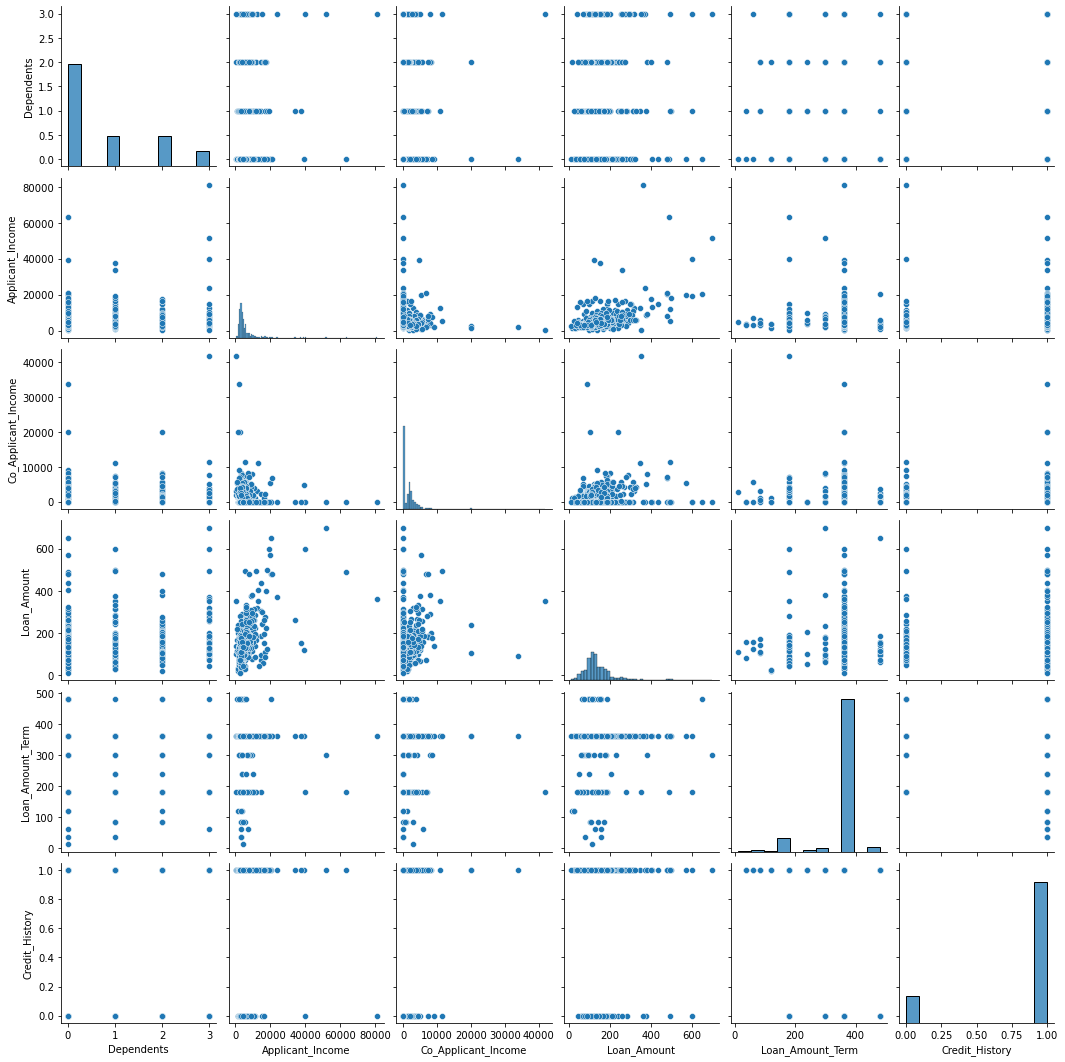

In [378]:
sns.pairplot(train_df)

## Machine Learning Model

In [379]:
# changing categorical columns to numerical 
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,Dependents,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [380]:
#split variables to start testing . Y = loan_status and X is everythig else 
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

#split into train - test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)



In [381]:
# cleaning data - entering missing values into mean value into all X values and used for training 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)



<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

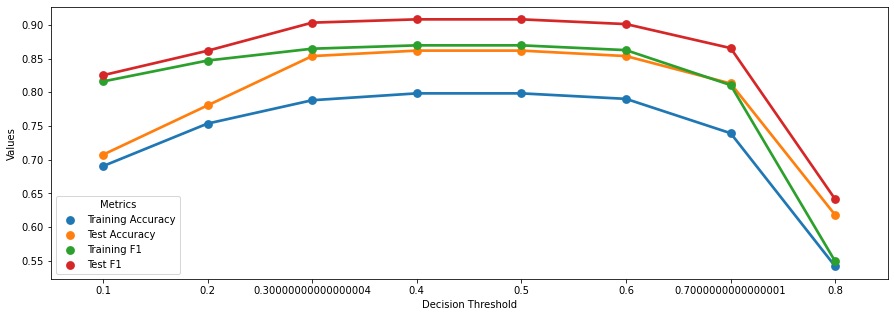

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): # Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): #Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [383]:
thresh = 0.4 # Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123
